In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
def custom_date_parser(s):
    try: return pd.datetime.strptime(s, '%m-%d-%Y')
    except ValueError: return pd.datetime.strptime(s, '%m/%d/%Y')

In [3]:
df = pd.read_csv('Daily+temperature+data.csv', parse_dates=['Date'], date_parser = custom_date_parser)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              730 non-null    datetime64[ns]
 1   Temperature(Min)  730 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [5]:
df = df.set_index('Date')


In [6]:
df

,Temperature(Min)
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5
...,...
2018-12-27,14.0
2018-12-28,13.6
2018-12-29,13.5


In [7]:
train_len = 511
train = df[0:train_len] # first 120 months as training set
test = df[train_len:] # last 24 months as out-of-time test set

In [8]:
from sklearn.metrics import mean_squared_error

## Holt winter


In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']) ,seasonal_periods=12,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.5, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 16.03999999999999, 'initial_trend': -0.26545454545454494, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [10]:
len(test)

219

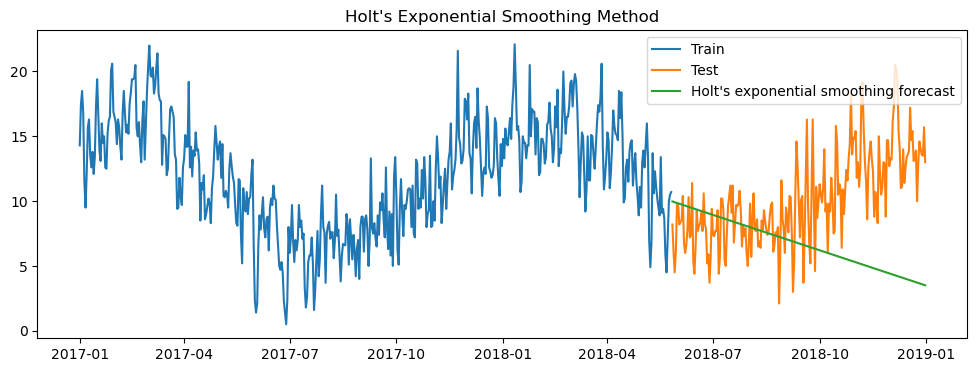

In [11]:
plt.figure(figsize=(12,4))
plt.plot( train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [12]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['holt_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Holt's exponential smoothing method,5.95,41.94
